<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana05b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de transporte

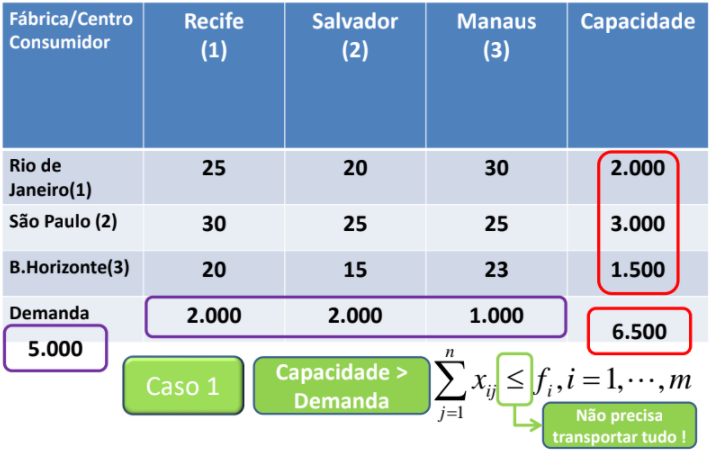

In [ ]:
# instalação e importação = rodar 2 vezes
! pip install ortools
from ortools.linear_solver import pywraplp

In [ ]:
costs = [[25, 20, 30], # custos
         [30, 25, 25],
         [20, 15, 23]] 
f = [2000, 3000, 1500] # capacidade da fábrica
d = [2000, 2000, 1000] # demanda dos mercados

num_fabricas = len(costs)
num_mercados = len(costs[0])

solver = pywraplp.Solver('Modelo de Transporte',
                         pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

# variáveis
x = {}
for i in range(num_fabricas):
  for j in range(num_mercados):
    x[i, j] = solver.NumVar(0, solver.infinity(), '')

# restrições
for i in range(num_fabricas):
  solver.Add(solver.Sum([x[i, j] for j in range(num_mercados)]) <= f[i], name= 'RFab'+str(i))

for j in range(num_mercados):
  solver.Add(solver.Sum([x[i, j] for i in range(num_fabricas)]) == d[j], name= 'RFab'+str(i))

# função objetivo
objective_terms = []
for i in range(num_fabricas):
  for j in range(num_mercados):
    objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))

# resolver
status = solver.Solve()

# relatório
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
  print('Custo total: ', solver.Objective().Value(), '\n')
  for i in range(num_fabricas):
    for j in range(num_mercados):
      if x[i, j].solution_value() > 0.01:
        print('Fábrica %d - Mercado %d - Fluxo %8.2f - Custo %8.2f' % (i+1,j+1,x[i,j].solution_value(), costs[i][j]*x[i,j].solution_value()))

Custo total:  110000.0 

Fábrica 1 - Mercado 1 - Fluxo  1500.00 - Custo 37500.00
Fábrica 1 - Mercado 2 - Fluxo   500.00 - Custo 10000.00
Fábrica 2 - Mercado 1 - Fluxo   500.00 - Custo 15000.00
Fábrica 2 - Mercado 3 - Fluxo  1000.00 - Custo 25000.00
Fábrica 3 - Mercado 2 - Fluxo  1500.00 - Custo 22500.00


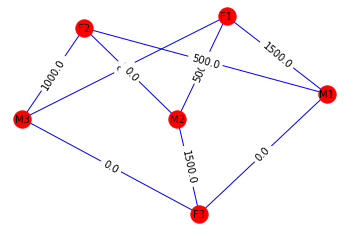

In [ ]:
# Criação do grafo

# importando bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

# cria o grafo vazio
G = nx.Graph()

# adiciona os nós das fábricas
for i in range(num_fabricas):
  node = 'F'+str(i+1)
  G.add_node(node, size=10, label=node)

# adiciona os nós dos mercados
for j in range(num_mercados):
  node = 'M'+str(j+1)
  G.add_node(node, size=10, label=node)

# adiciona os arcos
for i in range(num_fabricas):
  for j in range(num_mercados):
   # if (x[i, j].solution_value()>0):
      G.add_edge('F'+str(i+1), 'M'+str(j+1), element=str(x[i, j].solution_value()))

# criando ambiente
pos = nx.spring_layout(G)
edge_labels = dict([((u, v), G.get_edge_data(u, v)['element']) for u, v in G.edges])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw(G, pos, font_size=10, node_color='red', edge_color='blue', with_labels=True)